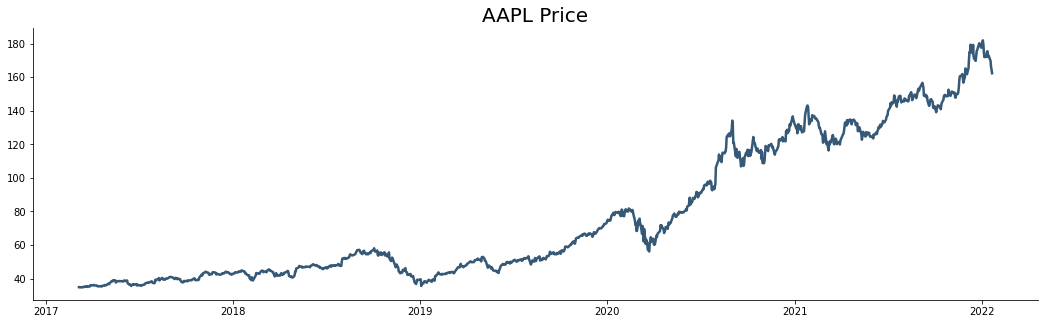

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('AAPL Price', size=20)
plt.plot(df);

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [3]:
df

,AAPL
Date,
2017-03-06,34.834999
2017-03-07,34.880001
2017-03-08,34.750000
2017-03-09,34.669998
2017-03-10,34.785000
...,...
2022-01-14,173.070007
2022-01-18,169.800003
2022-01-19,166.229996


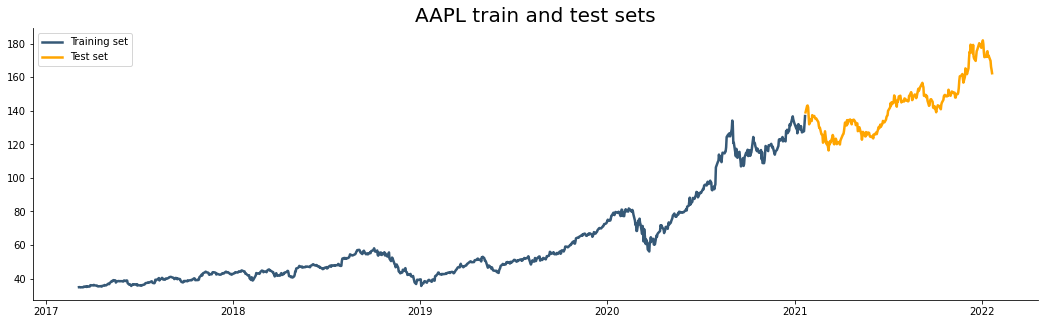

In [4]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('AAPL train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [5]:
from fbprophet import Prophet as proph

In [6]:
df_train

,AAPL
Date,
2017-03-06,34.834999
2017-03-07,34.880001
2017-03-08,34.750000
2017-03-09,34.669998
2017-03-10,34.785000
...,...
2021-01-14,128.910004
2021-01-15,127.139999
2021-01-19,127.830002


In [7]:
df_train.reset_index(inplace=True)

In [8]:
df_test

,AAPL
Date,
2021-01-22,139.070007
2021-01-25,142.919998
2021-01-26,143.160004
2021-01-27,142.059998
2021-01-28,137.089996
...,...
2022-01-14,173.070007
2022-01-18,169.800003
2022-01-19,166.229996


In [9]:
df_test.reset_index(inplace=True)

In [10]:
# Rename the columns [Date,AAPL] to [ds, y]

ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'AAPL': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'AAPL': 'y'})
ts.head(5)


,ds,y
0,2017-03-06,34.834999
1,2017-03-07,34.880001
2,2017-03-08,34.750000
3,2017-03-09,34.669998
4,2017-03-10,34.785000


In [11]:
x_test = ts_test[['ds']]

In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)

In [13]:
# Fit the timeseries into Model
Model.fit(ts)

In [14]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()


,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [15]:
future_dates

,ds
0,2017-03-06
1,2017-03-07
2,2017-03-08
3,2017-03-09
4,2017-03-10
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [16]:
future_dates= future_dates.loc[future_dates['ds'] >= '2021-01-22']

In [17]:
x_test = pd.DataFrame(x_test)

In [18]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [19]:
# Predict the values for future dates and take the head of forecast

predicitons = Model.predict(x_test)


In [20]:
forecast = Model.predict(future_dates)

In [21]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
754,2023-02-15,289.189770,41.807789,512.582638,32.243524,506.755438,4.989722,4.989722,4.989722,6.224925,...,0.441273,0.441273,0.441273,-1.676475,-1.676475,-1.676475,0.0,0.0,0.0,294.179492
755,2023-02-16,289.402779,35.889247,511.535152,31.749919,507.643576,4.873208,4.873208,4.873208,6.224925,...,0.367456,0.367456,0.367456,-1.719174,-1.719174,-1.719174,0.0,0.0,0.0,294.275987
756,2023-02-17,289.615788,35.938683,514.651902,31.256314,508.531714,4.629688,4.629688,4.629688,6.224925,...,0.171401,0.171401,0.171401,-1.766637,-1.766637,-1.766637,0.0,0.0,0.0,294.245476
757,2023-02-18,289.828797,35.122229,513.769864,30.762709,509.367317,3.626692,3.626692,3.626692,6.224925,...,-0.778116,-0.778116,-0.778116,-1.820117,-1.820117,-1.820117,0.0,0.0,0.0,293.455489
758,2023-02-19,290.041805,33.338701,514.836318,30.269104,509.939204,3.565862,3.565862,3.565862,6.224925,...,-0.778116,-0.778116,-0.778116,-1.880947,-1.880947,-1.880947,0.0,0.0,0.0,293.607667


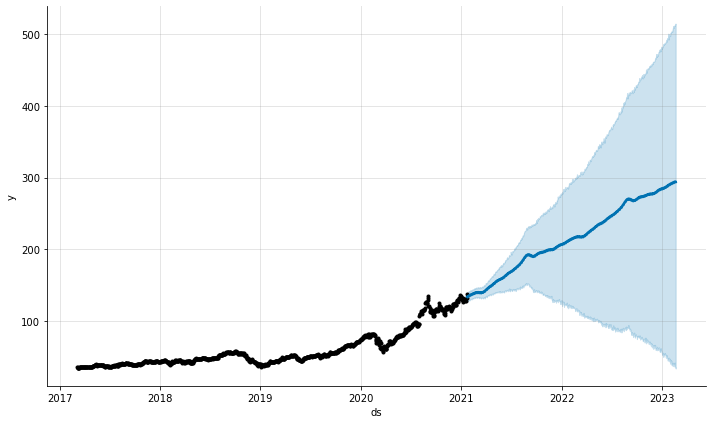

In [22]:
# Use prophet's plot function to plot the predictions

Model.plot(forecast, uncertainty=True)
plt.show()

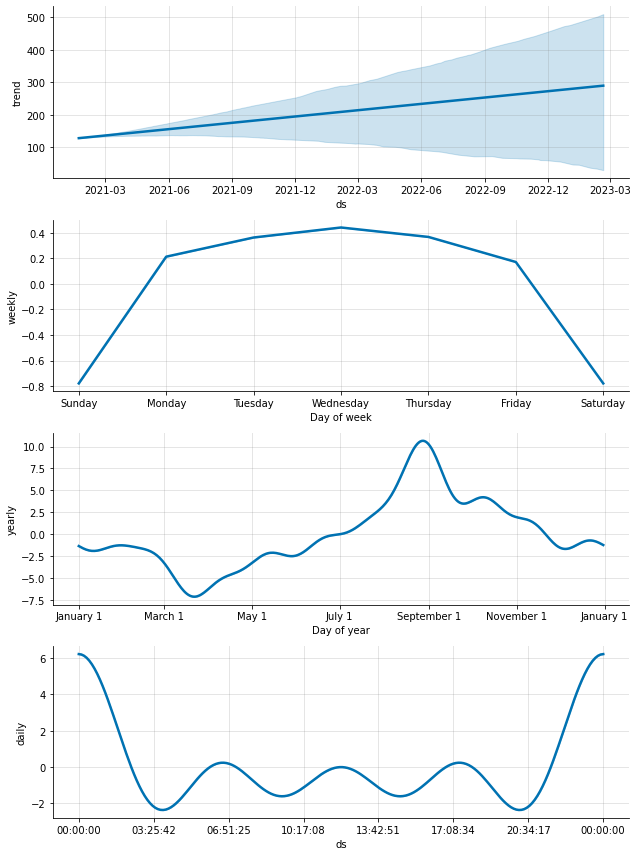

In [23]:
Model.plot_components(forecast)
plt.show()

In [24]:
df_test = pd.concat([df_test,predicitons], axis=1)
df_test

,Date,AAPL,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,139.070007,2021-01-22,128.581119,127.438309,139.846266,128.581119,128.581119,4.895044,4.895044,...,0.171401,0.171401,0.171401,-1.501281,-1.501281,-1.501281,0.0,0.0,0.0,133.476163
1,2021-01-25,142.919998,2021-01-25,129.220145,128.285598,140.404628,129.169121,129.226770,5.066464,5.066464,...,0.213124,0.213124,0.213124,-1.371585,-1.371585,-1.371585,0.0,0.0,0.0,134.286609
2,2021-01-26,143.160004,2021-01-26,129.433154,128.592570,140.852365,129.347075,129.482879,5.248174,5.248174,...,0.362978,0.362978,0.362978,-1.339729,-1.339729,-1.339729,0.0,0.0,0.0,134.681327
3,2021-01-27,142.059998,2021-01-27,129.646163,129.311468,141.310356,129.519883,129.741518,5.351633,5.351633,...,0.441273,0.441273,0.441273,-1.314565,-1.314565,-1.314565,0.0,0.0,0.0,134.997796
4,2021-01-28,137.089996,2021-01-28,129.859171,128.791794,141.908993,129.673528,130.000418,5.296034,5.296034,...,0.367456,0.367456,0.367456,-1.296348,-1.296348,-1.296348,0.0,0.0,0.0,135.155205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,173.070007,2022-01-14,204.625268,118.918764,290.093160,116.414917,285.083266,4.504941,4.504941,...,0.171401,0.171401,0.171401,-1.891384,-1.891384,-1.891384,0.0,0.0,0.0,209.130209
249,2022-01-18,169.800003,2022-01-18,205.477303,118.459522,290.593302,115.912651,287.244635,4.861199,4.861199,...,0.362978,0.362978,0.362978,-1.726704,-1.726704,-1.726704,0.0,0.0,0.0,210.338502
250,2022-01-19,166.229996,2022-01-19,205.690312,119.042054,292.926409,115.765294,287.880966,4.992217,4.992217,...,0.441273,0.441273,0.441273,-1.673981,-1.673981,-1.673981,0.0,0.0,0.0,210.682529
251,2022-01-20,164.509995,2022-01-20,205.903321,120.736593,294.260039,115.617937,288.451397,4.972491,4.972491,...,0.367456,0.367456,0.367456,-1.619890,-1.619890,-1.619890,0.0,0.0,0.0,210.875812


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,128.581119,127.265866,139.233676,128.581119,128.581119,4.895044,4.895044,4.895044,6.224925,...,0.171401,0.171401,0.171401,-1.501281,-1.501281,-1.501281,0.0,0.0,0.0,133.476163
1,2021-01-23,128.794127,126.867454,139.470534,128.794127,128.794127,3.993619,3.993619,3.993619,6.224925,...,-0.778116,-0.778116,-0.778116,-1.453190,-1.453190,-1.453190,0.0,0.0,0.0,132.787746
2,2021-01-24,129.007136,127.125332,139.896212,128.985154,129.007136,4.037164,4.037164,4.037164,6.224925,...,-0.778116,-0.778116,-0.778116,-1.409645,-1.409645,-1.409645,0.0,0.0,0.0,133.044301
3,2021-01-25,129.220145,128.326782,140.390911,129.160954,129.236363,5.066464,5.066464,5.066464,6.224925,...,0.213124,0.213124,0.213124,-1.371585,-1.371585,-1.371585,0.0,0.0,0.0,134.286609
4,2021-01-26,129.433154,128.289553,140.793811,129.316584,129.470616,5.248174,5.248174,5.248174,6.224925,...,0.362978,0.362978,0.362978,-1.339729,-1.339729,-1.339729,0.0,0.0,0.0,134.681327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2023-02-15,289.189770,41.807789,512.582638,32.243524,506.755438,4.989722,4.989722,4.989722,6.224925,...,0.441273,0.441273,0.441273,-1.676475,-1.676475,-1.676475,0.0,0.0,0.0,294.179492
755,2023-02-16,289.402779,35.889247,511.535152,31.749919,507.643576,4.873208,4.873208,4.873208,6.224925,...,0.367456,0.367456,0.367456,-1.719174,-1.719174,-1.719174,0.0,0.0,0.0,294.275987
756,2023-02-17,289.615788,35.938683,514.651902,31.256314,508.531714,4.629688,4.629688,4.629688,6.224925,...,0.171401,0.171401,0.171401,-1.766637,-1.766637,-1.766637,0.0,0.0,0.0,294.245476
757,2023-02-18,289.828797,35.122229,513.769864,30.762709,509.367317,3.626692,3.626692,3.626692,6.224925,...,-0.778116,-0.778116,-0.778116,-1.820117,-1.820117,-1.820117,0.0,0.0,0.0,293.455489


In [26]:
mean_squared_error(df_test.AAPL,df_test.yhat,squared=False)

33.56361706818334

In [1]:
mean(((df_test.AAPL - yhat))^2)

NameError: name 'mean' is not defined

# Concating new DF

In [27]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

,ds,yhat
372,2022-01-29,211.979937
373,2022-01-30,212.199053
374,2022-01-31,213.402859
375,2022-02-01,213.759207
376,2022-02-02,214.038534
...,...,...
754,2023-02-15,294.179492
755,2023-02-16,294.275987
756,2023-02-17,294.245476
757,2023-02-18,293.455489


In [28]:
concat_df.set_index('ds',inplace=True)

In [29]:
concat_df

,yhat
ds,
2022-01-29,211.979937
2022-01-30,212.199053
2022-01-31,213.402859
2022-02-01,213.759207
2022-02-02,214.038534
...,...
2023-02-15,294.179492
2023-02-16,294.275987
2023-02-17,294.245476


In [30]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [31]:
concat_df.columns = ['y']

In [32]:
df_test

,Date,AAPL,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,139.070007,2021-01-22,128.581119,127.438309,139.846266,128.581119,128.581119,4.895044,4.895044,...,0.171401,0.171401,0.171401,-1.501281,-1.501281,-1.501281,0.0,0.0,0.0,133.476163
1,2021-01-25,142.919998,2021-01-25,129.220145,128.285598,140.404628,129.169121,129.226770,5.066464,5.066464,...,0.213124,0.213124,0.213124,-1.371585,-1.371585,-1.371585,0.0,0.0,0.0,134.286609
2,2021-01-26,143.160004,2021-01-26,129.433154,128.592570,140.852365,129.347075,129.482879,5.248174,5.248174,...,0.362978,0.362978,0.362978,-1.339729,-1.339729,-1.339729,0.0,0.0,0.0,134.681327
3,2021-01-27,142.059998,2021-01-27,129.646163,129.311468,141.310356,129.519883,129.741518,5.351633,5.351633,...,0.441273,0.441273,0.441273,-1.314565,-1.314565,-1.314565,0.0,0.0,0.0,134.997796
4,2021-01-28,137.089996,2021-01-28,129.859171,128.791794,141.908993,129.673528,130.000418,5.296034,5.296034,...,0.367456,0.367456,0.367456,-1.296348,-1.296348,-1.296348,0.0,0.0,0.0,135.155205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,173.070007,2022-01-14,204.625268,118.918764,290.093160,116.414917,285.083266,4.504941,4.504941,...,0.171401,0.171401,0.171401,-1.891384,-1.891384,-1.891384,0.0,0.0,0.0,209.130209
249,2022-01-18,169.800003,2022-01-18,205.477303,118.459522,290.593302,115.912651,287.244635,4.861199,4.861199,...,0.362978,0.362978,0.362978,-1.726704,-1.726704,-1.726704,0.0,0.0,0.0,210.338502
250,2022-01-19,166.229996,2022-01-19,205.690312,119.042054,292.926409,115.765294,287.880966,4.992217,4.992217,...,0.441273,0.441273,0.441273,-1.673981,-1.673981,-1.673981,0.0,0.0,0.0,210.682529
251,2022-01-20,164.509995,2022-01-20,205.903321,120.736593,294.260039,115.617937,288.451397,4.972491,4.972491,...,0.367456,0.367456,0.367456,-1.619890,-1.619890,-1.619890,0.0,0.0,0.0,210.875812


In [33]:
df2 = df_test[['Date','AAPL']]

In [34]:
df2.set_index('Date',inplace=True)

In [35]:
temp_ds = ts.set_index('ds')

In [36]:
df2.columns = ['y']

In [37]:
final_df= pd.concat([temp_ds,df2,concat_df])
final_df

,y
2017-03-06,34.834999
2017-03-07,34.880001
2017-03-08,34.750000
2017-03-09,34.669998
2017-03-10,34.785000
...,...
2023-02-15,294.179492
2023-02-16,294.275987
2023-02-17,294.245476
2023-02-18,293.455489


In [38]:
final_df.to_csv('AAPL_final.csv')

In [39]:
ROI = (139.070007/293.607667)*100
ROI

47.365931694147484